In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('../dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.5)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [3]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 에포크(epoch)마다 모델의 정확도를 함께 기록하면서 저장 

In [4]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):  # 만일 위의 폴더가 존재하지 않으면
    os.mkdir(MODEL_DIR)            # 이 이름의 폴더를 만들어 줌

In [5]:
# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# save_best_only : 앞서 저장한 모델보다 나아졌을 때만 저장

# Overfitting Graph로 확인

In [6]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

# 이제 모델을 학습할 때마다 checkpointer의 값을 받아 지정된 곳에 모델을 저장
# Epoch 0~199까지 총 200개의 모델이 model 폴더에 저장
# 파일의 이름 = 에포크 수 & 이때의 테스트셋 오차 값

# 모델이 학습되는 과정을 history 변수를 만들어 저장
# 불러온 샘플 중 33%는 분리하여 Test Set

Epoch 1/3500
5/5 [==============================] - 0s 28ms/step - loss: 1.4515 - accuracy: 0.7569 - val_loss: 0.8018 - val_accuracy: 0.7500
Epoch 2/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.7137 - val_loss: 0.7096 - val_accuracy: 0.5924
Epoch 3/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.5668 - accuracy: 0.7109 - val_loss: 0.5063 - val_accuracy: 0.7519
Epoch 4/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.5181 - accuracy: 0.7578 - val_loss: 0.4710 - val_accuracy: 0.7556
Epoch 5/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.4443 - accuracy: 0.7675 - val_loss: 0.3841 - val_accuracy: 0.7957
Epoch 6/3500
5/5 [==============================] - 0s 4ms/step - loss: 0.3960 - accuracy: 0.8125 - val_loss: 0.3715 - val_accuracy: 0.8368
Epoch 7/3500
5/5 [==============================] - 0s 3ms/step - loss: 0.3651 - accuracy: 0.8506 - val_loss: 0.3291 - val_accuracy: 0.8545
Epoch 8/3500
5/5 [=

In [7]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']  # 'acc'가 아님(옛날버전)

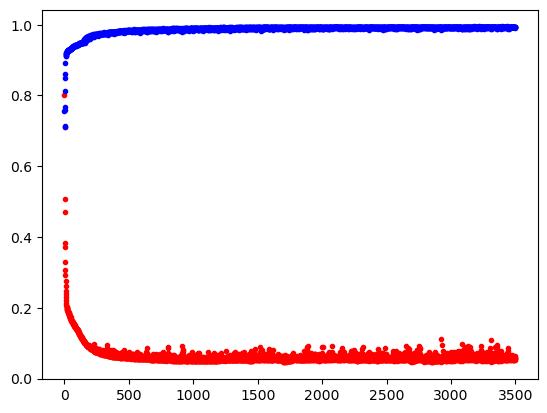

In [8]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

In [ ]:
# 학습이 진행될수록 학습셋의 정확도는 오르지만 테스트셋에서는 과적합 발생
# 학습셋의 정확도는 시간이 흐를수록 좋아집니다. 
# 하지만 테스트 결과는 어느 정도 이상 시간이 흐르면 더 나아지지 않는 것

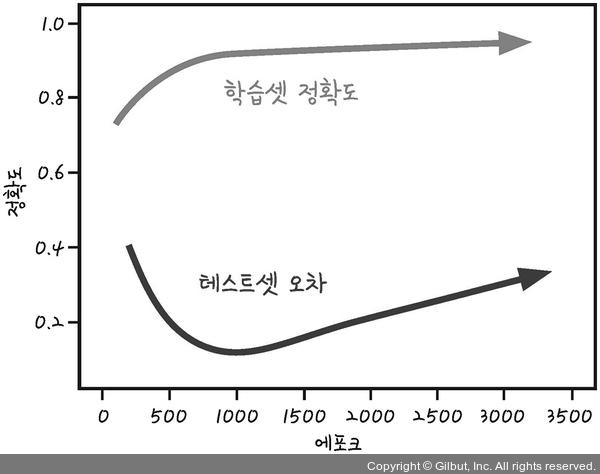